##**SYSC4906 Assignment 2**
**Name: Jonathan Arava**

**Student number: 101007533**

Portions of this template are based on notebook by Jorge Rodríguez Araújo

https://medium.com/abraia/first-steps-with-transfer-learning-for-custom-image-classification-with-keras-b941601fcad5

##**Step 1: Load the image dataset**

In [1]:
#%%capture
from glob import glob

# Load data from SYSC4906 GitHub repo:
!wget https://github.com/jrgreen7/SYSC4906/blob/master/Assignments/Assignment2/SYSC4906_Assig2_Data.zip?raw=true
!unzip SYSC4906_Assig2_Data.zip?raw=true

# Get list of filenames for the four datasets:
TRAIN_DIR = 'train'
TEST_DIR = 'test'
trump_train = glob('train/trump/*.jpeg')
trump_test = glob('test/trump/*.jpeg')
decoy_train = glob('train/decoy/*.jpeg')
decoy_test = glob('test/decoy/*.jpeg')

--2019-11-17 04:31:16--  https://github.com/jrgreen7/SYSC4906/blob/master/Assignments/Assignment2/SYSC4906_Assig2_Data.zip?raw=true
Resolving github.com (github.com)... 192.30.253.113
Connecting to github.com (github.com)|192.30.253.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/jrgreen7/SYSC4906/raw/master/Assignments/Assignment2/SYSC4906_Assig2_Data.zip [following]
--2019-11-17 04:31:17--  https://github.com/jrgreen7/SYSC4906/raw/master/Assignments/Assignment2/SYSC4906_Assig2_Data.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/jrgreen7/SYSC4906/master/Assignments/Assignment2/SYSC4906_Assig2_Data.zip [following]
--2019-11-17 04:31:17--  https://raw.githubusercontent.com/jrgreen7/SYSC4906/master/Assignments/Assignment2/SYSC4906_Assig2_Data.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.

###**Deliverable 1: Display the first image in each of the four sets.**

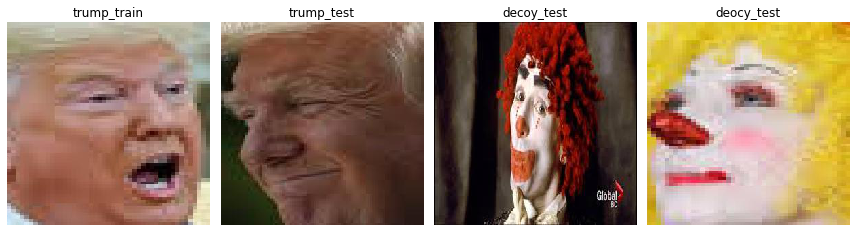

In [2]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 4, figsize=(12, 8))
ax = axes.ravel() # packs images next to eachother

# Trump Train
#trump_train.sort()
tTrain_1 = Image.open(trump_train[0])
ax[0].imshow(tTrain_1)
ax[0].axis("off")
ax[0].set_title("trump_train")

# Trump Test
#trump_test.sort()
tTest_1 = Image.open(trump_test[0])
ax[1].imshow(tTest_1)
ax[1].axis("off")
ax[1].set_title("trump_test")

# Decoy Train
#decoy_train.sort()
dTrain_1 = Image.open(decoy_train[0])
ax[2].imshow(dTrain_1)
ax[2].axis("off")
ax[2].set_title("decoy_test")

# Decoy Test
#decoy_test.sort()
dTest_1 = Image.open(decoy_test[0])
ax[3].imshow(dTest_1)
ax[3].axis("off")
ax[3].set_title("deocy_test")

fig.tight_layout()
plt.show()

##**Step 2: Load the original ImageNet-trained Inception v3**




In [3]:
from keras.applications.inception_v3 import InceptionV3
# load model
base_model = InceptionV3(weights='imagenet')

# Display a summary of the model structure:
base_model.summary()

Using TensorFlow backend.















96116736/96112376 [==============================] - 7s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 149, 149, 32) 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 149, 149, 32) 0           batch_normalization_1[0][0]      
_________

###**Deliverable 2: Number of parameters in layer 'conv2d_1 (Conv2D)'**
The conv2d_1 (Conv2D) layer has **864** parameters


##**Step 3: Test the original ImageNet-trained Inception v3 on our data**

In [4]:
from keras.applications.inception_v3 import decode_predictions, preprocess_input
import numpy as np
from keras.preprocessing import image as kp_image

WIDTH = 299
HEIGHT = 299

def predictImgNet(model, img):
    """Run model prediction on an image and decode predictions into 1000 ImageNet classes
    Args:
        model: keras model
        img: PIL format image
    Returns:
        list of predicted labels and their probabilities 
    """
    x = kp_image.img_to_array(img)  # Convert image to nparray
    x = np.expand_dims(x, axis=0)   # Need to pre-pend a dimension to indicate batch number.
    x = preprocess_input(x)         # Normalize image to match how Inceptionv3 expects to receive images
    preds = model.predict(x)        # Use the model to compute prediction score for each possible class
    labels = decode_predictions(preds) # Decodes the output classes back to the original labels for the 1000 ImageNet classes
    return labels[0]

# Clasify 'train/trump/100.jpeg'
tTrain_100 = Image.open('train/trump/100.jpeg')
print(predictImgNet(base_model, tTrain_100))


# Classify 'test/decoy/28.jpeg'
dTest_28 = Image.open('test/decoy/28.jpeg')
print(predictImgNet(base_model, dTest_28))

40960/35363 [==================================] - 0s 0us/step
[('n03814639', 'neck_brace', 0.42603034), ('n04584207', 'wig', 0.085619494), ('n02669723', 'academic_gown', 0.06182027), ('n04591157', 'Windsor_tie', 0.053091623), ('n03884397', 'panpipe', 0.016116256)]
[('n02883205', 'bow_tie', 0.9346934), ('n04584207', 'wig', 0.046026397), ('n07768694', 'pomegranate', 0.0012600437), ('n04399382', 'teddy', 0.0007310556), ('n03476684', 'hair_slide', 0.0006546831)]



###**Deliverable 3: What are the top-ranked predictions and their scores from the InceptionV3 original model for these two images?**
*   for train/trump/100.jpeg... 

1.   ('n03814639', 'neck_brace',    0.4260306)
2.   ('n04584207', 'wig',           0.08561979)
3.   ('n02669723', 'academic_gown', 0.06182016)
4.   ('n04591157', 'Windsor_tie',   0.053091552)
5.   ('n03884397', 'panpipe',       0.016116198)


*   for test/decoy/28.jpeg...

1.   ('n02883205', 'bow_tie',     0.93469334)
2.   ('n04584207', 'wig',         0.046026565)
3.   ('n07768694', 'pomegranate', 0.0012600446)
4.   ('n04399382', 'teddy',       0.00073105586)
5.   ('n03476684', 'hair_slide',  0.0006546837)






##**Step 4: Transfer Learning. Reload the InceptionV3 CNN, but with a new dense layer.**



In [5]:
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D, Dropout
from keras.applications.inception_v3 import InceptionV3, preprocess_input

CLASSES = 2
    
# Load base model, but ...
base_model = InceptionV3(weights='imagenet', include_top=False) #exclude top (GAP and DN layers)

# Funtion that finetunes the base model
def build_finetune_model(base_model, dropout, num_classes):
  #Freeze base model layer: "telling Keras not to update those weight during training"
  for layer in base_model.layers:
    layer.trainable = False

  x = base_model.output
  x = GlobalAveragePooling2D()(x) # re-adds a new GlobalAveragePooling layer
  x = Dropout(dropout)(x) # dropout layer with 50% chance of dropout
  predictions = Dense(num_classes, activation='softmax', name = 'predictions')(x) # dense layer with 2 clases & softmax ativation

  finetune_model = Model(inputs=base_model.input, outputs=predictions)

  return finetune_model

#Modified model
finetune_model = build_finetune_model(base_model, 0.5, CLASSES)

#Compile modeified model
finetune_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#Modified Model (finetune_model) Summary
finetune_model.summary()


87916544/87910968 [==============================] - 8s 0us/step
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv2d_95 (Conv2D)              (None, None, None, 3 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_95 (BatchNo (None, None, None, 3 96          conv2d_95[0][0]                  
__________________________________________________________________________________________________
activatio

###**Deliverable 4: Examine the layers in the full model (see Step 2) and the new modified model using summary(). Which layer has the largest difference in the number of learnable parameters, when comparing the two models? What type of layer is it and why did the number of learnable parameters change?**

The **Predictions (Dense)** layer changes the most. It is reduced from **2049000** down to **4098**. This is because **the number of classes in the base model is trained for 1000 classes but the modified model is trained for only 2 classes**.

*   **base_model dense layer calculation**


> (2048+1)*1000 = 2019000


*   **finetuned_model dense layer calculation**


> (2048+1)*2 = 4098





##**Step 5: Create training and validation image generators to augment image sets**

In [6]:
from keras.preprocessing.image import ImageDataGenerator

WIDTH = 299
HEIGHT = 299
BATCH_SIZE = 32

# data prep
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input, width_shift_range = 0.3, height_shift_range = 0.3, fill_mode ='nearest', horizontal_flip =True)
validation_datagen = ImageDataGenerator(preprocessing_function=preprocess_input, width_shift_range = 0.3, height_shift_range = 0.3, fill_mode ='nearest', horizontal_flip =True)

train_generator = train_datagen.flow_from_directory(TRAIN_DIR, target_size =(WIDTH,HEIGHT), batch_size=BATCH_SIZE, class_mode='categorical')
validation_generator = validation_datagen.flow_from_directory(TEST_DIR, target_size =(WIDTH,HEIGHT), batch_size=BATCH_SIZE, class_mode='categorical')



Found 200 images belonging to 2 classes.
Found 80 images belonging to 2 classes.


###**Deliverable 5: Invoke “next” on your training ImageDataGenerator to create a batch of 32 images and labels (where each label is a tuple). Create a 4rowx8col subplot matrix showing all 32 images. Each image should be titled with its label tuple.**

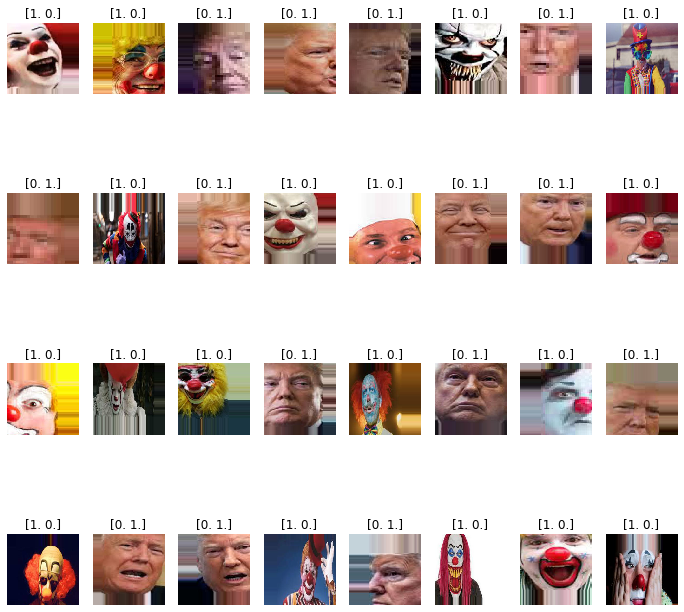

In [7]:
train_X, train_y = train_generator.next()

f = plt.figure(figsize=(12, 12))

for i, (X, y) in enumerate(zip(train_X, train_y)):
    subplt = plt.subplot(4, 8, i + 1)
    subplt.imshow((X + 1) / 2)
    subplt.set_title(str(y))
    subplt.axis("off")

f.show()

##**Step 6: Use transfer learning to train the new CNN**

In [8]:
EPOCHS = 10
BATCH_SIZE = 32
STEPS_PER_EPOCH = 3
VALIDATION_STEPS = 1

MODEL_FILE = 'filename.model'

history = finetune_model.fit_generator(generator= train_generator, 
                                       epochs = EPOCHS, 
                                      steps_per_epoch=STEPS_PER_EPOCH,
                                      validation_data=validation_generator,
                                      validation_steps=VALIDATION_STEPS)
  
finetune_model.save(MODEL_FILE)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/10
3/3 [==============================] - 13s 4s/step - loss: 0.7187 - acc: 0.5564 - val_loss: 0.7835 - val_acc: 0.5312
Epoch 2/10
3/3 [==============================] - 1s 425ms/step - loss: 0.7164 - acc: 0.5208 - val_loss: 0.5289 - val_acc: 0.7812
Epoch 3/10
3/3 [==============================] - 4s 1s/step - loss: 0.6584 - acc: 0.6667 - val_loss: 0.5565 - val_acc: 0.9375
Epoch 4/10
3/3 [==============================] - 3s 833ms/step - loss: 0.6165 - acc: 0.6354 - val_loss: 0.5666 - val_acc: 0.7188
Epoch 5/10
3/3 [==============================] - 2s 646ms/step - loss: 0.5381 - acc: 0.6710 - val_loss: 0.4933 - val_acc: 0.7812
Epoch 6/10
3/3 [==============================] - 2s 770ms/step - loss: 0.4900 - acc: 0.8021 - val_loss: 0.5230 - val_acc: 0.7500
Epoch 7/10
3/3 [==============================] - 3s 886ms/step - loss: 0.4670 - acc: 0.7960 - val_loss: 0.5307 - val_acc: 0.7812

###**Deliverable 6: Plot the training and validation loss at each training epoch (i.e. the learning curve). Repeat for accuracy instead of loss.**

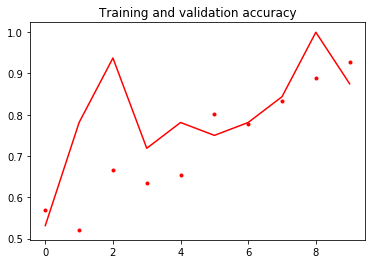

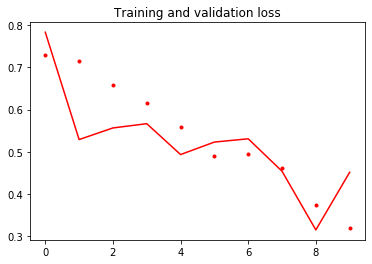

In [9]:
def plot_training(history):
  acc = history.history['acc']
  val_acc = history.history['val_acc']
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(len(acc))
  
  plt.plot(epochs, acc, 'r.')
  plt.plot(epochs, val_acc, 'r')
  plt.title('Training and validation accuracy')
  
  plt.figure()
  plt.plot(epochs, loss, 'r.')
  plt.plot(epochs, val_loss, 'r-')
  plt.title('Training and validation loss')
  plt.show()
  
plot_training(history)

##**Step 7: Test the new CNN**

In [0]:
from keras.models import load_model

model = load_model(MODEL_FILE)

In [11]:
from keras.applications.inception_v3 import decode_predictions, preprocess_input
import numpy as np
from keras.preprocessing import image as kp_image

HEIGHT = 299
WIDTH = 299

def predictTrump(model, img):
    """Run model prediction on an image and decode predictions into 1000 ImageNet classes
    Args:
        model: keras model
        img: PIL format image
    Returns:
        Class label with higher predicted probabilities 
    """
    x = kp_image.img_to_array(img)  # Convert image to nparray
    x = np.expand_dims(x, axis=0)   # Need to pre-pend a dimension to indicate batch number.
    x = preprocess_input(x)         # Normalize image to match how Inceptionv3 expects to receive images
    preds = model.predict(x)        # Use the model to compute prediction score for each possible class
    label = 'trump' if preds[0][1]>preds[0][0] else 'decoy' # Decodes the predicted class scores to assign a single class label
    return label

# Example code showing how to predict a single image label:
img = kp_image.load_img('test/decoy/28.jpeg', target_size=(HEIGHT, WIDTH))
label = predictTrump(finetune_model, img)
print(label) 

test_files = trump_test + decoy_test
y_true = ['trump'] * len(trump_test) + ['decoy'] * len(decoy_test)
y_pred = []
for filename in test_files:
    img = kp_image.load_img(filename, target_size=(HEIGHT, WIDTH))
    label = predictTrump(model, img)
    y_pred.append(label)


decoy


###**Deliverable 7: Print confusion matrix and accuracy:**

Total accuracy: 0.7625


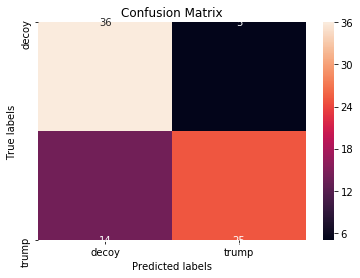

In [12]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt     

# Function to pretty-print confusion matrix. Doesn't work perfectly...
def printCM(cm,labels):
  ax= plt.subplot()
  sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

  # labels, title and ticks
  ax.set_xlabel('Predicted labels')
  ax.set_ylabel('True labels'); 
  ax.set_title('Confusion Matrix') 
  ax.xaxis.set_ticklabels(labels)
  ax.yaxis.set_ticklabels(labels)
  return

labels = ['decoy', 'trump']
cm = confusion_matrix(y_true, y_pred, labels)
printCM(cm, labels)
print("Total accuracy:", accuracy_score(y_true, y_pred))